# IMPORTING LIBRARIES

In [26]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation, BatchNormalization
from sklearn.model_selection import train_test_split
import random
import os

### IMPORTING FILES

In [27]:
filenames = os.listdir('C:/Users/User/Documents/anime_classifier/cnn_data')

In [28]:
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'eren':
        categories.append(0)
    if category == 'naruto':
        categories.append(1)
    if category == 'tanjiro':
        categories.append(2)

df = pd.DataFrame({
    'filename' : filenames,
    'categories' : categories
})

In [29]:
df

filename  categories
0        eren.0.jpg           0
1        eren.1.jpg           0
2       eren.10.jpg           0
3      eren.100.jpg           0
4      eren.101.jpg           0
..              ...         ...
293   tanjiro.9.jpg           2
294  tanjiro.90.jpg           2
295  tanjiro.91.jpg           2
296  tanjiro.92.jpg           2
297  tanjiro.93.jpg           2

[298 rows x 2 columns]

In [30]:
df['categories'].value_counts()

0    104
1    101
2     93
Name: categories, dtype: int64

In [31]:
df['categories']=df['categories'].replace({0: 'eren', 1: 'naruto', 2:'tanjiro'})
df

filename categories
0        eren.0.jpg       eren
1        eren.1.jpg       eren
2       eren.10.jpg       eren
3      eren.100.jpg       eren
4      eren.101.jpg       eren
..              ...        ...
293   tanjiro.9.jpg    tanjiro
294  tanjiro.90.jpg    tanjiro
295  tanjiro.91.jpg    tanjiro
296  tanjiro.92.jpg    tanjiro
297  tanjiro.93.jpg    tanjiro

[298 rows x 2 columns]

### MODEL 

In [32]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation ='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)       

### SPLITING THE DATA SET 

In [33]:
train_df, validate_df = train_test_split(df, test_size=0.2, random_state=0)

In [34]:
train_df['categories'].value_counts()

eren       84
naruto     84
tanjiro    70
Name: categories, dtype: int64

In [35]:
validate_df['categories'].value_counts()

tanjiro    23
eren       20
naruto     17
Name: categories, dtype: int64

### AUGMENTATION 

In [36]:
train_datagen = ImageDataGenerator(
    rotation_range = 15,
    rescale = 1./225,
    height_shift_range=0.1,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

validate_datagen = ImageDataGenerator(rescale = 1./225)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    'C:/Users/User/Documents/anime_classifier/cnn_data',
    x_col = 'filename',
    y_col = 'categories',
    target_size=(150,150),
    class_mode = 'categorical',
    batch_size = 32
)

validate_generator = validate_datagen.flow_from_dataframe(
    validate_df,
    'C:/Users/User/Documents/anime_classifier/cnn_data',
    x_col = 'filename',
    y_col = 'categories',
    target_size=(150,150),
    class_mode = 'categorical',
    batch_size = 32
)

Found 238 validated image filenames belonging to 3 classes.
Found 60 validated image filenames belonging to 3 classes.


In [37]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

### TRAINING THE DATA 

In [38]:
history = model.fit(
    train_generator,
    epochs = 40,
    validation_data = validate_generator,
    validation_steps = total_validate/32,
    steps_per_epoch = total_train/32
)

Epoch 1/40
7/7 [==============================] - 11s 1s/step - loss: 2.1029 - accuracy: 0.3161 - val_loss: 1.1145 - val_accuracy: 0.2500
Epoch 2/40
7/7 [==============================] - 10s 1s/step - loss: 1.0752 - accuracy: 0.4011 - val_loss: 1.0963 - val_accuracy: 0.3000
Epoch 3/40
7/7 [==============================] - 10s 1s/step - loss: 1.0861 - accuracy: 0.4449 - val_loss: 1.0908 - val_accuracy: 0.4333
Epoch 4/40
7/7 [==============================] - 10s 1s/step - loss: 1.0634 - accuracy: 0.4540 - val_loss: 1.0602 - val_accuracy: 0.3833
Epoch 5/40
7/7 [==============================] - 10s 1s/step - loss: 1.0080 - accuracy: 0.4645 - val_loss: 1.0492 - val_accuracy: 0.4000
Epoch 6/40
7/7 [==============================] - 10s 1s/step - loss: 0.9691 - accuracy: 0.5561 - val_loss: 0.9700 - val_accuracy: 0.6167
Epoch 7/40
7/7 [==============================] - 10s 1s/step - loss: 0.9005 - accuracy: 0.5695 - val_loss: 0.9433 - val_accuracy: 0.6333
Epoch 8/40
7/7 [==================

In [39]:
predict_filenames = os.listdir('C:/Users/User/Documents/anime_classifier/predict')

### PREDICTION 

In [40]:
predict_df = pd.DataFrame({
    'filename' : predict_filenames
})

In [41]:
predict_df

filename
0    x.0.jpg
1    x.1.jpg
2   x.10.jpg
3   x.11.jpg
4   x.13.jpg
5   x.14.jpg
6   x.15.jpg
7   x.16.jpg
8   x.17.jpg
9   x.18.jpg
10  x.19.jpg
11  x.20.jpg
12  x.21.jpg
13  x.22.jpg
14  x.24.jpg
15  x.25.jpg
16  x.26.jpg
17  x.27.jpg
18  x.28.jpg
19  x.29.jpg
20   x.3.jpg
21  x.30.jpg
22  x.31.jpg
23  x.32.jpg
24  x.33.jpg
25  x.34.jpg
26  x.35.jpg
27  x.36.jpg
28  x.37.jpg
29  x.38.jpg
30  x.39.jpg
31   x.4.jpg
32  x.40.jpg
33  x.41.jpg
34  x.42.jpg
35  x.43.jpg
36  x.44.jpg
37  x.45.jpg
38  x.46.jpg
39  x.47.jpg
40  x.48.jpg
41  x.49.jpg
42   x.5.jpg
43  x.50.jpg
44  x.51.jpg
45  x.52.jpg
46  x.53.jpg
47  x.54.jpg
48  x.55.jpg
49  x.56.jpg
50  x.57.jpg
51  x.58.jpg
52   x.6.jpg
53   x.7.jpg
54   x.8.jpg

In [42]:
total_pred = predict_df.shape[0]
total_pred

55

In [43]:
pred_datagen = ImageDataGenerator(rescale = 1./225)

pred_generator = pred_datagen.flow_from_dataframe(
    predict_df,
    'C:/Users/User/Documents/anime_classifier/predict',
    x_col = 'filename',
    y_col = None,
    class_mode = None,
    target_size=(150,150),
    batch_size=16,
    shuffle = False
)

Found 55 validated image filenames.


In [44]:
predicted = model.predict(pred_generator, steps=mp.ceil(total_pred/16))

In [45]:
predicted

array([[7.09754527e-01, 9.58961621e-03, 2.80655861e-01],
       [7.73583710e-01, 1.57998707e-02, 2.10616440e-01],
       [5.81986160e-06, 9.99991775e-01, 2.36476762e-06],
       [9.87539806e-06, 9.99877095e-01, 1.12950715e-04],
       [2.42429990e-02, 9.42298174e-01, 3.34587991e-02],
       [1.46728773e-02, 9.02742982e-01, 8.25841278e-02],
       [2.84556776e-01, 5.16868114e-01, 1.98575050e-01],
       [4.24677879e-01, 1.09187879e-01, 4.66134191e-01],
       [6.13754615e-02, 9.27402914e-01, 1.12215756e-02],
       [4.79909659e-07, 9.99999404e-01, 1.35854890e-07],
       [1.00186868e-02, 9.87149715e-01, 2.83154519e-03],
       [6.34359643e-02, 8.34121466e-01, 1.02442525e-01],
       [2.93900311e-01, 1.28528520e-01, 5.77571154e-01],
       [1.55688837e-01, 5.04173599e-02, 7.93893874e-01],
       [9.13707465e-02, 3.59555222e-02, 8.72673750e-01],
       [5.05979896e-01, 1.61319822e-01, 3.32700282e-01],
       [3.26833934e-01, 1.25834256e-01, 5.47331810e-01],
       [2.22672522e-03, 8.33573

In [46]:
predict_df['category'] = mp.argmax(predicted, axis=-1)
predict_df

filename  category
0    x.0.jpg         0
1    x.1.jpg         0
2   x.10.jpg         1
3   x.11.jpg         1
4   x.13.jpg         1
5   x.14.jpg         1
6   x.15.jpg         1
7   x.16.jpg         2
8   x.17.jpg         1
9   x.18.jpg         1
10  x.19.jpg         1
11  x.20.jpg         1
12  x.21.jpg         2
13  x.22.jpg         2
14  x.24.jpg         2
15  x.25.jpg         0
16  x.26.jpg         2
17  x.27.jpg         2
18  x.28.jpg         2
19  x.29.jpg         2
20   x.3.jpg         0
21  x.30.jpg         1
22  x.31.jpg         0
23  x.32.jpg         0
24  x.33.jpg         0
25  x.34.jpg         0
26  x.35.jpg         0
27  x.36.jpg         0
28  x.37.jpg         0
29  x.38.jpg         1
30  x.39.jpg         2
31   x.4.jpg         0
32  x.40.jpg         2
33  x.41.jpg         1
34  x.42.jpg         1
35  x.43.jpg         1
36  x.44.jpg         1
37  x.45.jpg         1
38  x.46.jpg         0
39  x.47.jpg         1
40  x.48.jpg         1
41  x.49.jpg         2
42   x.5.jpg         0
43  x.50.jpg         2
44  x.51.jpg         2
45  x.52.jpg         2
46  x.53.jpg         2
47  x.54.jpg         2
48  x.55.jpg         2
49  x.56.jpg         2
50  x.57.jpg         2
51  x.58.jpg         2
52   x.6.jpg         0
53   x.7.jpg         0
54   x.8.jpg         0

In [47]:
predict_df['category']=predict_df['category'].replace({0: 'eren', 1: 'naruto', 2:'tanjiro'})


In [48]:
predict_df

filename category
0    x.0.jpg     eren
1    x.1.jpg     eren
2   x.10.jpg   naruto
3   x.11.jpg   naruto
4   x.13.jpg   naruto
5   x.14.jpg   naruto
6   x.15.jpg   naruto
7   x.16.jpg  tanjiro
8   x.17.jpg   naruto
9   x.18.jpg   naruto
10  x.19.jpg   naruto
11  x.20.jpg   naruto
12  x.21.jpg  tanjiro
13  x.22.jpg  tanjiro
14  x.24.jpg  tanjiro
15  x.25.jpg     eren
16  x.26.jpg  tanjiro
17  x.27.jpg  tanjiro
18  x.28.jpg  tanjiro
19  x.29.jpg  tanjiro
20   x.3.jpg     eren
21  x.30.jpg   naruto
22  x.31.jpg     eren
23  x.32.jpg     eren
24  x.33.jpg     eren
25  x.34.jpg     eren
26  x.35.jpg     eren
27  x.36.jpg     eren
28  x.37.jpg     eren
29  x.38.jpg   naruto
30  x.39.jpg  tanjiro
31   x.4.jpg     eren
32  x.40.jpg  tanjiro
33  x.41.jpg   naruto
34  x.42.jpg   naruto
35  x.43.jpg   naruto
36  x.44.jpg   naruto
37  x.45.jpg   naruto
38  x.46.jpg     eren
39  x.47.jpg   naruto
40  x.48.jpg   naruto
41  x.49.jpg  tanjiro
42   x.5.jpg     eren
43  x.50.jpg  tanjiro
44  x.51.jpg  tanjiro
45  x.52.jpg  tanjiro
46  x.53.jpg  tanjiro
47  x.54.jpg  tanjiro
48  x.55.jpg  tanjiro
49  x.56.jpg  tanjiro
50  x.57.jpg  tanjiro
51  x.58.jpg  tanjiro
52   x.6.jpg     eren
53   x.7.jpg     eren
54   x.8.jpg     eren

### Displaying RESULT

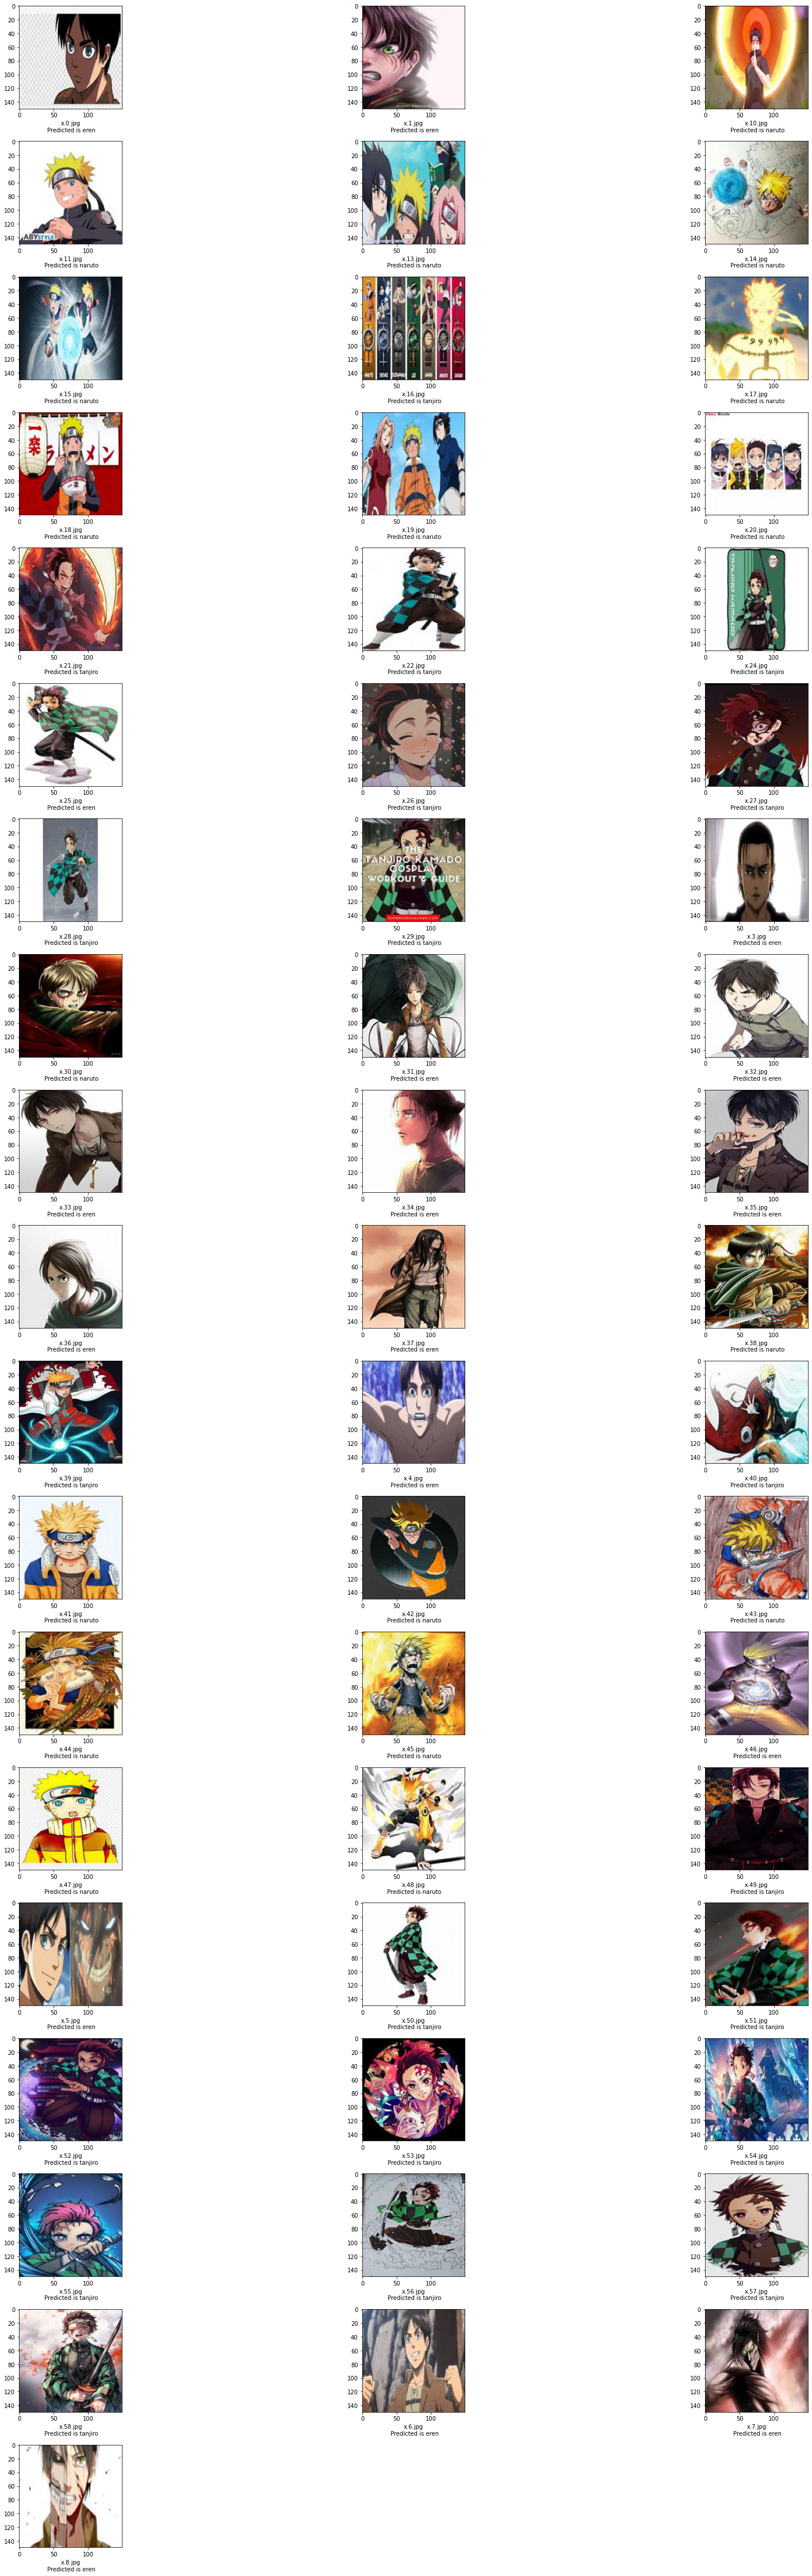

In [49]:
plt.figure(figsize=(25, 65))
for index, row in predict_df.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("C:/Users/User/Documents/anime_classifier/predict/"+filename, target_size=(150,150)) 
    plt.subplot(20, 3, index+1)      
    plt.imshow(img)
    plt.xlabel(filename + "\n Predicted is " + "{}".format(category))
plt.tight_layout()
plt.show()